## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()

# Combine the data into a single dataset

combined_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
rows_initial = combined_study["Mouse ID"].count()

In [2]:
combined_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
Mouse_ID_List = combined_study["Mouse ID"].unique()
Num_Mice_before = len(Mouse_ID_List)
Num_Mice_before


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Cleaned_combined_df = combined_study.drop_duplicates(["Mouse ID","Timepoint"],keep = False)
#len(combined_study["Mouse ID"].unique())

#sorting data by MouseID then timepoint so have time ordered for each mouse - making sure no issues in data recording
combined_study.sort_values(["Mouse ID", "Timepoint"], inplace = True)

problem_id = []

for i in range (0,(len(combined_study)-1)):
        Mouse_ID_1 = combined_study.iloc[i,0]
        Mouse_ID_2 = combined_study.iloc[i+1,0]
        if Mouse_ID_1 == Mouse_ID_2:
            if combined_study.iloc[i,5] == combined_study.iloc[i+1,5]:
                problem_id.append(Mouse_ID_1)
print(problem_id)
problem_mouse = list(set(problem_id))
problem_mouse

['g989', 'g989', 'g989', 'g989', 'g989']


['g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


for x in problem_mouse:
    combined_study = combined_study[combined_study["Mouse ID"]!= x]

Num_Mice_after = len(combined_study["Mouse ID"].unique())

rows_after = combined_study["Mouse ID"].count()

print(f"Initial record length {rows_initial}")
print(f"Filtered record length {rows_after}")
print ("")
print(f"Initial number of mice {Num_Mice_before} ") 
print(f"after filtering new number is {Num_Mice_after}")

print(f"Problem mice: {problem_mouse}")

Initial record length 1893
Filtered record length 1880

Initial number of mice 249 
after filtering new number is 248
Problem mice: ['g989']


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Isolate the Regimens used in the study
regimen_list = combined_study["Drug Regimen"].unique()

#Perform groupby on the Regimen
study_groupby = combined_study.groupby("Drug Regimen")

#Calculate statistics of the study for different Regimens
mean_grouped = study_groupby["Tumor Volume (mm3)"].mean()
median_grouped = study_groupby["Tumor Volume (mm3)"].median()
var_grouped = study_groupby["Tumor Volume (mm3)"].var()
std_grouped = study_groupby["Tumor Volume (mm3)"].std()
SEM_grouped = study_groupby["Tumor Volume (mm3)"].sem()
Count_grouped = study_groupby["Tumor Volume (mm3)"].count()

Summary_df= pd.DataFrame(mean_grouped)
Summary_df = Summary_df.rename(columns = {"Tumor Volume (mm3)":"Mean"})
Summary_df["Median"]=median_grouped
Summary_df["Variance"]=var_grouped
Summary_df["STDev"]=std_grouped
Summary_df["SEM"]=SEM_grouped
Summary_df["Count"]=Count_grouped

Summary_df


,Mean,Median,Variance,STDev,SEM,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

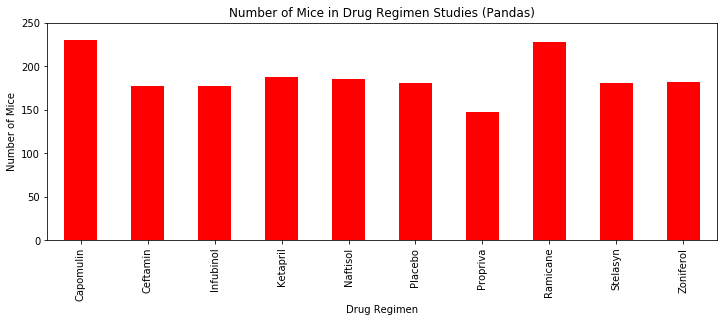

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
x_axis = Summary_df.index
y_axis = Summary_df["Count"]

# Use DataFrame.plot() in order to create a bar chart of the data
Summary_df["Count"].plot(kind="bar", color = "r", figsize=(12,4))
# Set a title for the chart
plt.title("Number of Mice in Drug Regimen Studies (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0,250)
plt.show()
plt.tight_layout()


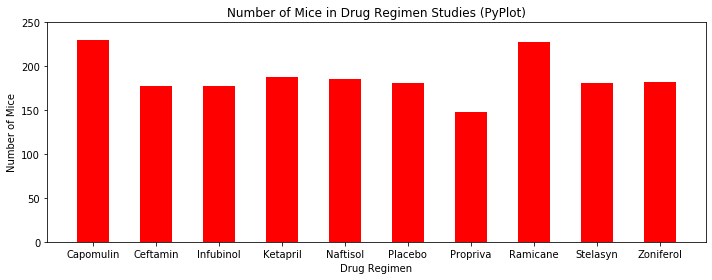

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using Pyplot
plt.figure(figsize=(10,4)) #10 inches wide by 4" tall

plt.bar(x_axis, y_axis, color='r', width = 0.5, alpha=1, align="center") #alpha is how transparent bars are
plt.ylim(0, 250)

plt.title("Number of Mice in Drug Regimen Studies (PyPlot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout() #tight layout helps to arrange the graph to look nicer

plt.show()


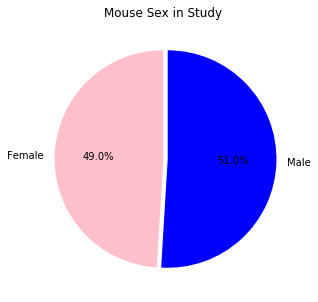

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Mouse_sex_group = combined_study.groupby("Sex")
Mouse_sex_df = Mouse_sex_group["Sex"].count()
Mouse_sex_df
colors = ["Pink", "Blue"]
explode = [0,0.04]

plot = Mouse_sex_df.plot.pie( figsize=(5, 5), startangle = 90, autopct = "%1.1f%%", colors = colors, 
                     explode = explode, title = "Mouse Sex in Study" )
plt.ylabel('')
plt.show()

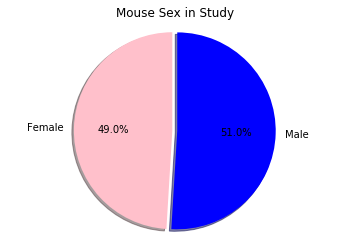

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Label = Mouse_sex_df.index

data = Mouse_sex_df.iloc[:]
data

colors = ["Pink", "Blue"]

explode = (0, 0.05)

plt.title("Mouse Sex in Study")
plt.pie(data, explode=explode, labels=Label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#create list of the highlighted promising treatments
promising_treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#create dataframe for new promising treatment data
promising_treatment_df = pd.DataFrame()

#iterate through combined_study data to isolate only promising treatment data
for x in promising_treatment_list:
    promising_treatment_df = promising_treatment_df.append(combined_study[combined_study["Drug Regimen"] == x])

#iterate through dataframe for promising treatments to isolate the final tumor volume.  Occurs when mouse ID changes.    
final_tumor_volumes_df = pd.DataFrame()

for x in range(1, (len(promising_treatment_df)-1)):
            mouse_ID1 = promising_treatment_df.iloc[x][0]
            mouse_ID2 = promising_treatment_df.iloc[x+1][0]
            if mouse_ID1 != mouse_ID2:
                selected_data = promising_treatment_df.iloc[x][:]
                final_tumor_volumes_df = final_tumor_volumes_df.append(selected_data)

final_tumor_volumes_df = final_tumor_volumes_df.rename(columns = {"Tumor Volume (mm3)": "Final Tumor Volume"})
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volumes_df

,Age_months,Drug Regimen,Metastatic Sites,Mouse ID,Sex,Timepoint,Final Tumor Volume,Weight (g)
309,9.0,Capomulin,2.0,b128,Female,45.0,38.982878,22.0
299,7.0,Capomulin,0.0,b742,Male,45.0,38.939633,21.0
64,16.0,Capomulin,0.0,f966,Male,20.0,30.485985,17.0
244,3.0,Capomulin,1.0,g288,Male,45.0,37.074024,19.0
360,22.0,Capomulin,2.0,g316,Female,45.0,40.159220,22.0
...,...,...,...,...,...,...,...,...
1670,24.0,Ceftamin,3.0,w151,Male,45.0,67.527482,25.0
1743,23.0,Ceftamin,0.0,x226,Male,0.0,45.000000,28.0
1773,19.0,Ceftamin,3.0,x581,Female,45.0,64.634949,28.0
1797,3.0,Ceftamin,3.0,x822,Male,45.0,61.386660,29.0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatment_list

# Create empty list to fill with tumor vol data (for plotting

final_tumor_vol0 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[0]]["Final Tumor Volume"]
final_tumor_vol1 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[1]]["Final Tumor Volume"]
final_tumor_vol2 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[2]]["Final Tumor Volume"]
final_tumor_vol3 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[3]]["Final Tumor Volume"]

final_tumor_vol0.reset_index(inplace = True, drop = True)
final_tumor_vol1.reset_index(inplace = True, drop = True)
final_tumor_vol2.reset_index(inplace = True, drop = True)
final_tumor_vol3.reset_index(inplace = True, drop = True)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


final_tumor_data[promising_treatment_list[0]]=final_tumor_vol0
final_tumor_data[promising_treatment_list[1]]=final_tumor_vol1
final_tumor_data[promising_treatment_list[2]]=final_tumor_vol2
final_tumor_data[promising_treatment_list[3]]=final_tumor_vol3

quartiles_df = pd.DataFrame()

quartiles_df[promising_treatment_list[0]] = final_tumor_data[promising_treatment_list[0]].quantile([0.25,0.5,0.75])
quartiles_df[promising_treatment_list[1]] = final_tumor_data[promising_treatment_list[1]].quantile([0.25,0.5,0.75])
quartiles_df[promising_treatment_list[2]] = final_tumor_data[promising_treatment_list[2]].quantile([0.25,0.5,0.75])
quartiles_df[promising_treatment_list[3]] = final_tumor_data[promising_treatment_list[3]].quantile([0.25,0.5,0.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

#determining iqr's and adding to dataframe
iqr_0 = quartiles_df.iloc[2][0]-quartiles_df.iloc[0][0]
iqr_1 = quartiles_df.iloc[2][1]-quartiles_df.iloc[0][1]
iqr_2 = quartiles_df.iloc[2][2]-quartiles_df.iloc[0][2]
iqr_3 = quartiles_df.iloc[2][3]-quartiles_df.iloc[0][3]
iqr_row = pd.Series(data = {promising_treatment_list[0]: iqr_0, promising_treatment_list[1]:iqr_1, 
                           promising_treatment_list[2]: iqr_2, promising_treatment_list[3]: iqr_3}, name = "IQR")
quartiles_df = quartiles_df.append(iqr_row, ignore_index=False)

#determining lower bounds and adding to dataframe
lower_bound_0 = quartiles_df.iloc[0][0]-1.5*quartiles_df.iloc[3][0]
lower_bound_1 = quartiles_df.iloc[0][1]-1.5*quartiles_df.iloc[3][1]
lower_bound_2 = quartiles_df.iloc[0][2]-1.5*quartiles_df.iloc[3][2]
lower_bound_3 = quartiles_df.iloc[0][3]-1.5*quartiles_df.iloc[3][3]
lower_bound_row = pd.Series(data = {promising_treatment_list[0]: lower_bound_0, promising_treatment_list[1]:lower_bound_1, 
                           promising_treatment_list[2]: lower_bound_2, promising_treatment_list[3]: lower_bound_3}, 
                            name = "lower bound")
quartiles_df = quartiles_df.append(lower_bound_row, ignore_index=False)

#determining upper bounds and adding to dataframe
upper_bound_0 = quartiles_df.iloc[2][0]+1.5*quartiles_df.iloc[3][0]
upper_bound_1 = quartiles_df.iloc[2][1]+1.5*quartiles_df.iloc[3][1]
upper_bound_2 = quartiles_df.iloc[2][2]+1.5*quartiles_df.iloc[3][2]
upper_bound_3 = quartiles_df.iloc[2][3]+1.5*quartiles_df.iloc[3][3]
upper_bound_row = pd.Series(data = {promising_treatment_list[0]: upper_bound_0, promising_treatment_list[1]:upper_bound_1, 
                           promising_treatment_list[2]: upper_bound_2, promising_treatment_list[3]: upper_bound_3}, 
                            name = "upper bound")
quartiles_df = quartiles_df.append(upper_bound_row, ignore_index=False)

#new_row = pd.Series(data={'name':'Geo', 'physics':87, 'chemistry':92}, name='x')


quartiles_df
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
    
# Determine outliers using upper and lower bounds

,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.487729
0.5,38.125164,36.561652,60.165180,59.796928
0.75,40.159220,40.659006,65.525743,64.219213
IQR,7.781863,9.098537,11.477135,15.731485
lower bound,20.704562,17.912664,36.832905,24.890502
upper bound,51.832015,54.306811,82.741446,87.816440


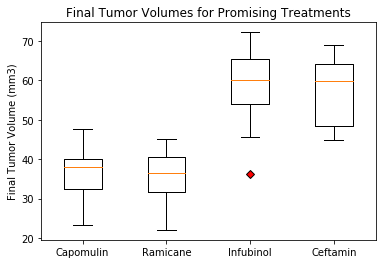

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_diamond = dict(markerfacecolor='r', marker='D')
#ax3.boxplot(data, flierprops=green_diamond)

labels = promising_treatment_list
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Promising Treatments')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([final_tumor_vol0, final_tumor_vol1, final_tumor_vol2, final_tumor_vol3], showfliers = True,
           flierprops = red_diamond, labels=labels)
plt.show()



## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
